In [1]:
import matplotlib.image as mpimg
import numpy as np
import os
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

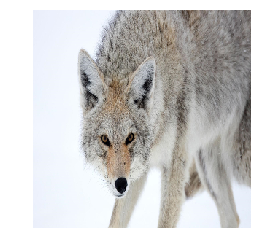

In [2]:
# 8] a) #get the images for testing and resize and store them
iwidth = 299
iheight = 299
color_ch = 3
timage = mpimg.imread(os.path.join("Images","wolf.png"))[:, :, :color_ch]
plt.imshow(timage)
plt.axis("off")
plt.show()

In [3]:
import glob
for file in glob.glob("/home/nharpale/PA3/Images/*.png"):
    im = Image.open(file)
    timg = im.resize((299, 299))
    ##plt.imshow(timg)
    ##print(file)
    timg.save(file)
    ##plt.axis("off")
    ##plt.show()    

In [4]:
##plt.imshow(timg)
    ##print(file)
    ##timg.save(file)
    ##plt.axis("off")
    ##plt.show()    

In [5]:
#8] b) Go to checkpoint foler and also access class_names
INCEPTION_PATH = os.path.join("datasets", "inception")

In [6]:
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

In [7]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    path = os.path.join("datasets", "inception", "imagenet_class_names.txt")
    with open(path, encoding="utf-8") as f:
        content = f.read()
        return CLASS_NAME_REGEX.findall(content)

In [8]:
class_names = ["background"] + load_class_names()

In [9]:
class_names[:5]

['background',
 'tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri']

In [10]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [11]:
#8] c)
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim
import tensorflow as tf

reset_graph()

X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
        X, num_classes=1001, is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
##8]  d) Restore the model
with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt


INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt


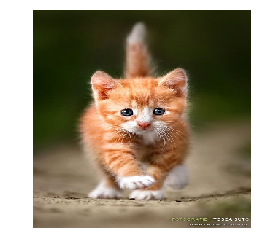

Persian cat: 18.79%
tiger cat: 16.23%
tabby, tabby cat: 4.92%
Egyptian cat: 4.12%
Pomeranian: 2.38%
INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt


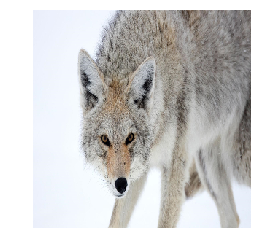

coyote, prairie wolf, brush wolf, Canis latrans: 88.30%
timber wolf, grey wolf, gray wolf, Canis lupus: 1.11%
grey fox, gray fox, Urocyon cinereoargenteus: 1.02%
red wolf, maned wolf, Canis rufus, Canis niger: 0.86%
white wolf, Arctic wolf, Canis lupus tundrarum: 0.45%
INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt


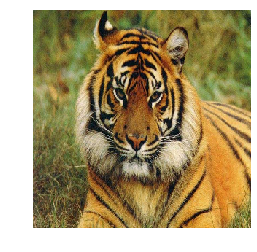

tiger, Panthera tigris: 86.90%
tiger cat: 6.05%
lynx, catamount: 0.10%
space shuttle: 0.07%
leopard, Panthera pardus: 0.06%
INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt


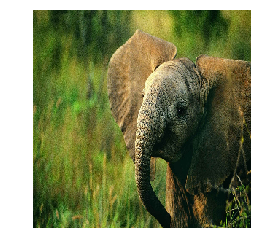

African elephant, Loxodonta africana: 49.95%
Indian elephant, Elephas maximus: 25.47%
tusker: 12.51%
African chameleon, Chamaeleo chamaeleon: 0.13%
dugong, Dugong dugon: 0.12%
INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt


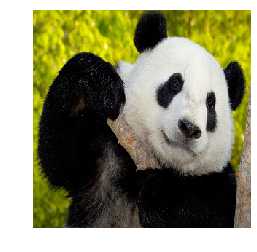

giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca: 92.24%
soccer ball: 0.12%
space shuttle: 0.08%
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens: 0.07%
white stork, Ciconia ciconia: 0.05%


In [13]:
##8] e)
for file in glob.glob("/home/nharpale/PA3/Images/*.png"):
    ti = mpimg.imread(os.path.join(file))[:, :, :color_ch]
    X_test = ti.reshape(-1, iheight, iwidth, color_ch)

    with tf.Session() as sess:
        saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
        plt.imshow(ti)
        plt.axis("off")
        plt.show()
        predictions_val = predictions.eval(feed_dict={X: X_test})
        most_likely_class_index = np.argmax(predictions_val[0])
        most_likely_class_index
        class_names[most_likely_class_index]
        top_5 = np.argpartition(predictions_val[0], -5)[-5:]
        top_5 = reversed(top_5[np.argsort(predictions_val[0][top_5])])
        for i in top_5:
            print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val[0][i]))

In [ ]:
## Explanation about accuracy
#1) I don't like the accuracy for cat photo. This is probably because the cat looks more like a tiger cub. But still the
## model was okay at predicting a cat.
#2) The model is pretty confident about wolf.
#3) The model has good accuracy about tiger.
## It not easy to classify wilds cats with very good accuracy but its reasonable. 
#4) I think the inception model is not good at calssifying babies of animals. As we can see elephant baby was not 
## classified with high confidence. I think the model just randomnly guessed.
#5) The model performed best for classifying the Panda. I thought the confidence for this one would be less than 85 percent
## because the panda is holding a wooden stick and this might mess a little bit. But the model performed best on this image.

In [14]:
## 9] a) Get the flower dataset and randomized the dataset
FLOWERS_PATH = os.path.join("datasets", "flowers")
flowers_root_path = os.path.join(FLOWERS_PATH, "flower_photos")
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))])
flower_classes


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [15]:
from collections import defaultdict

image_paths = defaultdict(list)

for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path, flower_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith(".jpg"):
            image_paths[flower_class].append(os.path.join(image_dir, filepath))
for paths in image_paths.values():
    paths.sort()

Class: daisy


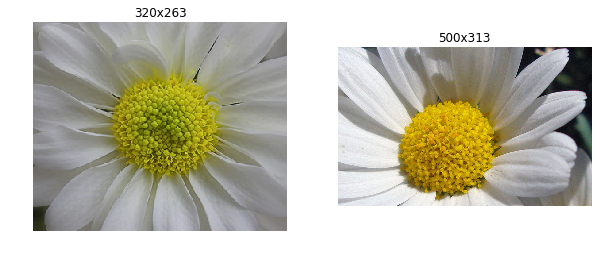

Class: dandelion


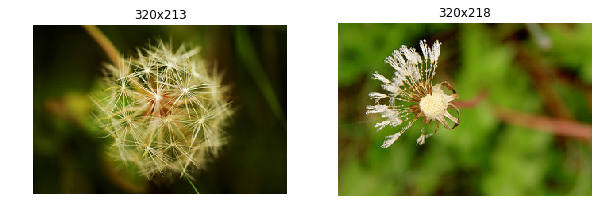

Class: roses


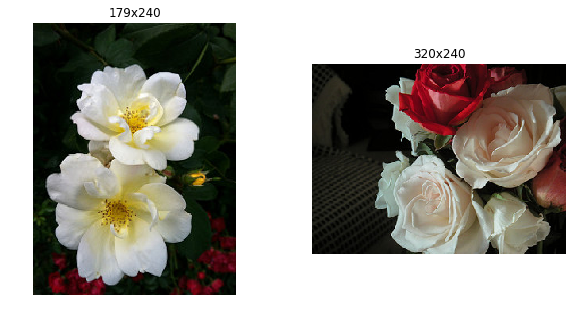

Class: sunflowers


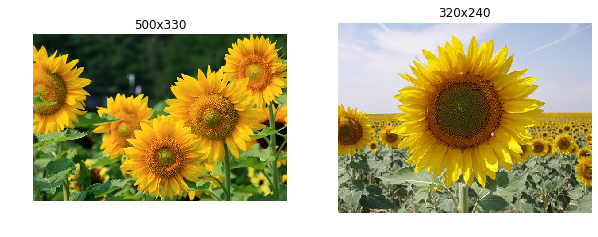

Class: tulips


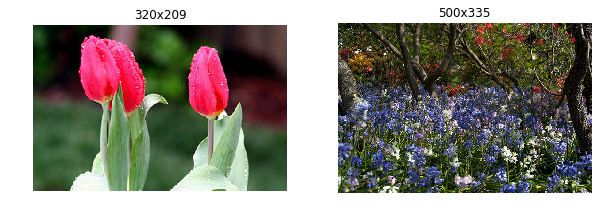

In [16]:
import matplotlib.image as mpimg

n_examples_per_class = 2

for flower_class in flower_classes:
    print("Class:", flower_class)
    plt.figure(figsize=(10,5))
    for index, example_image_path in enumerate(image_paths[flower_class][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:, :, :color_ch]
        plt.subplot(100 + n_examples_per_class * 10 + index + 1)
        plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis("off")
    plt.show()

In [17]:
## 9] b) Random crop and resize
from skimage.transform import resize
target_width = 299
target_height = 299
max_zoom = 0.2
def random_crop(image):
#   img_height = img.shape[0]
#   img_width = img.shape[1]
#   x = np.random.randint(0, (img_width - iwidth + 1))
#   y = np.random.randint(0, (img_height - iheight + 1))
#   cimg = img[y:y + iheight, x:x + iwidth]
#   rimg = resize(cimg, (iwidth, iheight))
#   return rimg.astype(np.float32)   
    height = image.shape[0]
    width = image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
        
    
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    
    
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    
    
    image = image[y0:y1, x0:x1]
    if np.random.rand() < 0.5:
        image = np.fliplr(image) 
    image = resize(image, (target_width, target_height))
    return image.astype(np.float32)

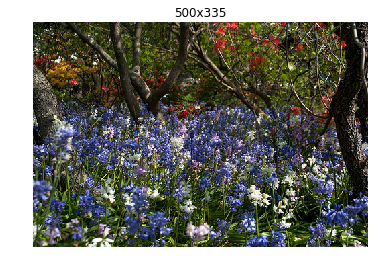

In [18]:
plt.figure(figsize=(6, 8))
plt.imshow(example_image)
plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
plt.axis("off")
plt.show()

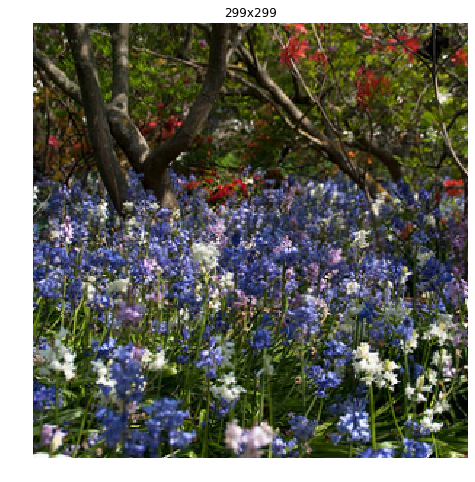

In [19]:
prepared_image = random_crop(example_image)

plt.figure(figsize=(8, 8))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

In [20]:
##9] c) Freeze and replace the desired layer
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

reset_graph()

X = tf.placeholder(tf.float32, shape=[None, iheight, iwidth, color_ch], name="X")
training = tf.placeholder_with_default(False, shape=[])
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=training)

inception_saver = tf.train.Saver()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
logits.op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Conv2d_1c_1x1/BiasAdd:0' shape=(?, 1, 1, 1001) dtype=float32>

In [22]:
logits.op.inputs[0].op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Conv2d_1c_1x1/Conv2D:0' shape=(?, 1, 1, 1001) dtype=float32>

In [23]:
end_points

{'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 35, 192) dtype=float32>,
 'Mixed_5b': <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5b/concat:0' shape=(?, 35, 35, 256) dtype=float32>,
 'Mixed_5c': <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5c/concat:0' shape=(?,

In [24]:
prelogits = tf.squeeze(end_points["PreLogits"], axis=[1, 2])

In [25]:
n_outputs = len(flower_classes)

with tf.name_scope("new_output_layer"):
    flower_logits = tf.layers.dense(prelogits, n_outputs, name="flower_logits")
    Y_proba = tf.nn.softmax(flower_logits, name="Y_proba")

Instructions for updating:
Use keras.layers.dense instead.


In [26]:
y = tf.placeholder(tf.int32, shape=[None])

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=flower_logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    flower_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="flower_logits")
    training_op = optimizer.minimize(loss, var_list=flower_vars)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(flower_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [27]:
# 9] d)
flower_class_ids = {flower_class: index for index, flower_class in enumerate(flower_classes)}
flower_class_ids

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [28]:
flower_paths_and_classes = []
for flower_class, paths in image_paths.items():
    for path in paths:
        flower_paths_and_classes.append((path, flower_class_ids[flower_class]))

In [29]:
test_ratio = 0.2
train_size = int(len(flower_paths_and_classes) * (1 - test_ratio))

np.random.shuffle(flower_paths_and_classes)

flower_paths_and_classes_train = flower_paths_and_classes[:train_size]
flower_paths_and_classes_test = flower_paths_and_classes[train_size:]

In [30]:
flower_paths_and_classes_train[:3]

[('datasets/flowers/flower_photos/daisy/19834392829_7d697871f6.jpg', 0),
 ('datasets/flowers/flower_photos/sunflowers/5957007921_62333981d2_n.jpg', 3),
 ('datasets/flowers/flower_photos/tulips/7166635566_ee240b5408_n.jpg', 4)]

In [31]:
from random import sample

def batch(flower_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(flower_paths_and_classes, batch_size)
    images = [mpimg.imread(path)[:, :, :color_ch] for path, labels in batch_paths_and_classes]
    prepared_images = [random_crop(image) for image in images]
    X_batch = 2 * np.stack(prepared_images) - 1 # Inception expects colors ranging from -1 to 1
    y_batch = np.array([labels for path, labels in batch_paths_and_classes], dtype=np.int32)
    return X_batch, y_batch

In [32]:
X_batch, y_batch = batch(flower_paths_and_classes_train, batch_size=4)

In [33]:
X_test, y_test = batch(flower_paths_and_classes_test, batch_size=len(flower_paths_and_classes_test))

In [39]:
# training
n_epochs = 4
batch_size = 20
n_iterations_per_epoch = len(flower_paths_and_classes_train) // batch_size

with tf.Session() as sess:
    init.run()
    inception_saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

    for epoch in range(n_epochs):
        print("Epoch", epoch, end="")
        for iteration in range(n_iterations_per_epoch):
            print(".", end="")
            X_batch, y_batch = batch(flower_paths_and_classes_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})

        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("  Last batch accuracy:", acc_batch)

        save_path = saver.save(sess, "./my_flowers_model")

INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt
Epoch 0..................................................................................................................................................  Last batch accuracy: 0.6
Epoch 1..................................................................................................................................................  Last batch accuracy: 0.6
Epoch 2..................................................................................................................................................  Last batch accuracy: 0.6
Epoch 3..................................................................................................................................................  Last batch accuracy: 0.85


In [40]:
## testing
n_test_batches = 10
X_test_batches = np.array_split(X_test, n_test_batches)
y_test_batches = np.array_split(y_test, n_test_batches)

with tf.Session() as sess:
    saver.restore(sess, "./my_flowers_model")

    print("Final accuracy on the test set")
    acc_test = np.mean([
        accuracy.eval(feed_dict={X: X_test_batch, y: y_test_batch})
        for X_test_batch, y_test_batch in zip(X_test_batches, y_test_batches)])
    print("Test accuracy:", acc_test)

INFO:tensorflow:Restoring parameters from ./my_flowers_model
Final accuracy on the test set
Test accuracy: 0.68252504
